In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
from preprocessing import data_loder
import matplotlib.pyplot as plt



## load data

In [2]:
df = pd.read_csv("../../Dataset/processed/AMAZON_FASHION_5.csv")
print(df.shape)
print(df.columns)

(2962, 4)
Index(['reviewerID', 'asin', 'overall', 'reviewText'], dtype='object')


## count of unique user

In [6]:
print(df.groupby("reviewerID").count().shape[0])


749233


In [ ]:
print(df.groupby("asin").count().shape[0])

In [7]:
## number of review per user

186189


## number of review per user

7.822660098522167
AxesSubplot(0.125,0.125;0.775x0.755)


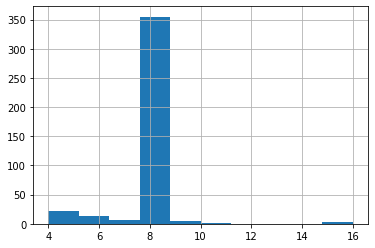

In [4]:
print(df.groupby("reviewerID")["overall"].count().mean())
print(df.groupby("reviewerID")["overall"].count().hist())

## delete unnecessary column

In [5]:
drop_cols = [
    'verified', 'reviewTime', 'style',
    'reviewerName', 'summary', 'unixReviewTime', 'vote',
    'image'
]
for col in drop_cols:
    df.drop(col, axis=1, inplace=True)

print(df.columns)

Index(['overall', 'reviewerID', 'asin', 'reviewText'], dtype='object')


## Missing value

In [6]:
df.isnull().sum()


overall        0
reviewerID     0
asin           0
reviewText    16
dtype: int64

In [7]:
df_ = df

df_.iloc[[0, 1, 3], df_.columns.get_loc("overall")] = df_.iloc[[0, 1, 3], df_.columns.get_loc("overall")].values

print(df_.head())





   overall     reviewerID        asin                reviewText
0      5.0  ALJ66O1Y6SLHA  B000K2PJ4K  Great product and price!
1      5.0  ALJ66O1Y6SLHA  B000K2PJ4K  Great product and price!
2      5.0  ALJ66O1Y6SLHA  B000K2PJ4K  Great product and price!
3      5.0  ALJ66O1Y6SLHA  B000K2PJ4K  Great product and price!
4      5.0  ALJ66O1Y6SLHA  B000K2PJ4K  Great product and price!


In [8]:
df_.iloc[[0, 1, 3], df_.columns.get_loc("overall")].values



array([5., 5., 5.])

In [9]:
df_new = df.groupby(["reviewerID", "asin"], as_index=False).mean()
df_new = pd.DataFrame(df_new)
print(df_new.head(10))



       reviewerID        asin  overall
0  A10RXRZE0TAKPU  B0014F7B98      4.0
1  A10RXRZE0TAKPU  B001IKJOLW      4.0
2  A10RXRZE0TAKPU  B0058YEJ5K      4.0
3  A10RXRZE0TAKPU  B005AGO4LU      4.0
4  A10RXRZE0TAKPU  B0092UF54A      4.0
5  A10RXRZE0TAKPU  B009MA34NY      4.0
6  A10RXRZE0TAKPU  B010RRWKT4      4.0
7  A10RXRZE0TAKPU  B014IBJKNO      4.0
8  A10WPKF2VH1JWY  B0014F7B98      4.0
9  A10WPKF2VH1JWY  B001IKJOLW      4.0


In [10]:
df_new.iloc[[0, 3, 1], 2] = [1, 2, 3]
print(df_new.head(10))




       reviewerID        asin  overall
0  A10RXRZE0TAKPU  B0014F7B98      1.0
1  A10RXRZE0TAKPU  B001IKJOLW      3.0
2  A10RXRZE0TAKPU  B0058YEJ5K      4.0
3  A10RXRZE0TAKPU  B005AGO4LU      2.0
4  A10RXRZE0TAKPU  B0092UF54A      4.0
5  A10RXRZE0TAKPU  B009MA34NY      4.0
6  A10RXRZE0TAKPU  B010RRWKT4      4.0
7  A10RXRZE0TAKPU  B014IBJKNO      4.0
8  A10WPKF2VH1JWY  B0014F7B98      4.0
9  A10WPKF2VH1JWY  B001IKJOLW      4.0


In [24]:
import h5py
import numpy as np

a = np.array([[1, 2, 3, 4, 5], [6, 5, 4, 3, 2]])
b = [1, 2, 3, 4, 5]
print(a)

[[1 2 3 4 5]
 [6 5 4 3 2]]


In [25]:
fname = './sample.hdf5'

with h5py.File(fname, 'w') as f:
    f.create_dataset('a', data=a)
    f.create_dataset('b', data=b)


In [33]:
infh = h5py.File(fname, 'r')
print(infh.keys())
## [u'expmat', u'gene_name', u'sample_name']

a = infh['a'].value
b = infh['b'].value

infh.close()


<KeysViewHDF5 ['a', 'b']>


<ipython-input-33-baa5f1392e14>:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  a = infh['a'].value
<ipython-input-33-baa5f1392e14>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  b = infh['b'].value


In [34]:
print(a)
print(b)

[[1 2 3 4 5]
 [6 5 4 3 2]]
[1 2 3 4 5]


In [1]:
li = [1, 2, 3]



In [2]:
li.pop(-1)

3

In [3]:
li

[1, 2]